See `../ch07_Input_prep/072_Observed_data.ipynb` for data processing.

#### Notebook config

In [1]:
# %load ../../software/fullwavepy/fullwavepy/config/jupyter.py 
from fullwavepy import * # Load modules imported in fullwavepy/__init__.py
# -----------------------------------------------------------------------------
# Set aliases of frequently used jupyter magic commands
# -----------------------------------------------------------------------------
%alias_magic mi matplotlib -p inline
%alias_magic mn matplotlib -p notebook
# -----------------------------------------------------------------------------
# Set matplotlib backend
# -----------------------------------------------------------------------------
# non-interactive plots displayed in a notebook cell
%matplotlib inline
# interactive plots displayed in a notebook cell
# %matplotlib notebook (interactive version)
# -----------------------------------------------------------------------------
# Set matplotlib style
# ----------------------------------------------------------------------------
plt.style.reload_library()
# a combined style (right overwrites left wherever they overlap):
plt.style.use(['default'])
# print(plt.style.available) 
# -----------------------------------------------------------------------------
# Configure logging
# -----------------------------------------------------------------------------
# Set up loggers, handlers and load the log_lvl function
from fullwavepy.config.logging import *
# -----------------------------------------------------------------------------
# Set level of log-messages
log_lvl(INFO) 
# Other options in order of increasing importance and 
# decreasing verbosity:
# TRACE, DEBUG, INFO, WARNING, ERROR, CRITICAL
# or using integers: 0, 10, 20, 30, 40, 50, respectively
# -----------------------------------------------------------------------------
# Autocompleting
# -----------------------------------------------------------------------------
#  Not sure if it works
%config IPCompleter.greedy=True 
# -----------------------------------------------------------------------------
# Automatically reload modules before execution
#%load_ext autoreload
#%autoreload 2

Created `%mi` as an alias for `%matplotlib inline`.
Created `%mn` as an alias for `%matplotlib notebook`.


##### Loading extra modules

In [2]:
import pandas as pd
from fullwavepy.seismic.proteus import PROTEUS

##### Testing the `seismic` package

In [14]:
!python3 -m unittest fullwavepy.seismic.test.test_exps -v

test_read_metadata (fullwavepy.seismic.test.test_exps.TestPROTEUS) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.051s

OK


In [31]:
!python3 -m unittest fullwavepy.seismic.test.test_metadata -v

test_init (fullwavepy.seismic.test.test_metadata.TestBox3d) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.000s

OK


In [80]:
!python3 -m unittest fullwavepy.seismic.test.test_data -v

test_init (fullwavepy.seismic.test.test_data.TestDataSet) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.000s

OK


# Pre-processing

## Data format

#### File-name format

In [31]:
exp.dataset['lanvz']['801'].fname

'/home/kmc3817/heavy_PhD/DATA/Santorini_2015/seismic/land/Santorini/segy_local_coords//MGL1521_L801_1.sgy'

In [29]:
exp.dataset['obsvz']['101'].fname

'/home/kmc3817/heavy_PhD/DATA/Santorini_2015/seismic/OBS/segy_local_coords//MGL1521_S101_1.sgy'

In [18]:
exp.dataset['obshy']['101'].fname

'/home/kmc3817/heavy_PhD/DATA/Santorini_2015/seismic/OBS/segy_local_coords//MGL1521_S101_4.sgy'

#### OBS data SEGY headers

In [32]:
exp.dataset['obshy']['101'].surange()

3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00833137 s, 384 kB/s

14231 traces:
tracl    1 14231 (1 - 14231)
tracr    1 14231 (1 - 14231)
fldr     9882 46337 (9882 - 46337)
tracf    4101
ep       1 60 (4 - 33)
trid     1
offset   86 81658 (38344 - 43117)
gelev    458
selev    -12
sdepth   12
swdep    18 1273 (744 - 435)
gwdep    458
scalel   1
scalco   1
sx       -57515 60987 (60987 - -16327)
sy       -11369 28177 (17709 - -1028)
gx       22644
gy       17418
counit   1
tstat    17
ns       12000
dt       5000
gain     1
igc      16
year     2015
day      327 341 (327 - 341)
hour     0 23 (5 - 14)
minute   0 59 (34 - 4)
sec      0 59 (5 - 36)
timbas   0 999 (95 - 428)
ntr      14231

Shot coordinate limits:
	North(-36820,28177) South(-5596,-11369) East(60987,17709) West(-57515,5507)

Receiver coordinate limits:
	North(22644,17418) South(22644,17418) East(22644,17418) West(22644,17418)

Midpoint coordinate limits:
	North(-7088,22797.5) South(8524,3024.5) Eas

#### Land data SEGY headers

In [33]:
exp.dataset['lanvz']['801'].surange()

3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00730552 s, 438 kB/s

13696 traces:
tracl    1 13696 (1 - 13696)
tracr    1 13696 (1 - 13696)
fldr     9882 44056 (9882 - 44056)
tracf    1801
ep       1 60 (4 - 36)
trid     1
offset   4108 62941 (62941 - 55571)
gelev    -361
selev    -12
sdepth   12
swdep    18 1273 (744 - 488)
scalel   1
scalco   1
sx       -57515 60987 (60987 - -51470)
sy       -11369 28177 (17709 - 6929)
gx       2615
gy       -5833
counit   1
tstat    17
laga     -4999 5000 (-800 - -3873)
ns       7000
dt       10000
year     2015
day      327 340 (327 - 340)
hour     0 23 (5 - 23)
minute   0 59 (34 - 25)
sec      0 59 (4 - 40)
timbas   4

Shot coordinate limits:
	North(-36820,28177) South(-5596,-11369) East(60987,17709) West(-57515,5507)

Receiver coordinate limits:
	North(2615,-5833) South(2615,-5833) East(2615,-5833) West(2615,-5833)

Midpoint coordinate limits:
	North(-17102.5,11172) South(-1490.5,-8601) East(31801,5938) West(-27450,-163

## Data size

In [1]:
# calculate 
print('Single-channel OBS and land data take %s GB and %s GB of disk space, respectively.' % ((88 * 655 / 1000),(369 * 31 / 1000)))

Single-channel OBS and land data take 57.64 GB and 11.439 GB of disk space, respectively.


#### Check on disk

In [4]:
!du -h {exp.dataset['obshy']['101'].fname}

655M	/home/kmc3817/heavy_PhD/DATA/Santorini_2015/seismic/OBS/segy_local_coords//MGL1521_S101_4.sgy


In [6]:
!ls {exp.dataset['obshy']['101'].path}/*_4.sgy | wc -l

88


In [10]:
!du -hs {exp.dataset['lanvz']['801'].fname}

du: cannot access '{exp.dataset[lanvz][801].fname}': No such file or directory


In [43]:
!ls {exp.dataset['lanvz']['801'].path}/*_1.sgy | wc -l

31


## Coordinates

First, make sure you use 'Python 3' kernel to access `fullwavepy` routines. We will switch to 'pygmt' kernel for plots only.

#### Alg. 
Define the extent of local coordinates of the model.

In [7]:
x1 = +8.0e3
x2 = +2.5e4   
y1 = -3.0e3   
y2 = +1.5e4    
z1 = 0
z2 = +4.0e3
b01 = Box3d(x1, x2, y1, y2, z1, z2)

#### Alg. 
Create a grid from these coordinates.

In [4]:
h = 50 # m
X = np.arange(x1, x2+h, h)
Y = np.arange(y1, y2+h, h)
Z = np.arange(z1, z2+h, h)
xx, yy = np.meshgrid(X,Y, indexing='ij')
XY = np.zeros((2,len(xx.flatten())))
XY[0,:] = xx.flatten()
XY[1,:] = yy.flatten()

In [10]:
XY.shape

(2, 123101)

#### Alg. 
Peform the coordinate rotation which converts them (back) to UTM.

In [18]:
%%time 
from fullwavepy.seismic.proteus import CoordSystemPROTEUS
R = CoordSystemPROTEUS.rotation_matrix(25.5)
X, Y = R.dot(XY)

CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 3.8 ms


#### Fig. 
Compare coordinates before and after rotation. This shows that the rotation has a correct sign. The axis of rotation is in the centre of the local coordinates system which outside of this box.

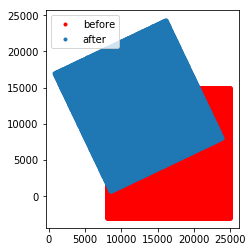

In [24]:
# plot 
plt.plot(XY[0], XY[1], '.', c='r', label='before')
plt.plot(X, Y, '.', label='after')
aspeqt(plt.gca())
_= plt.legend()

#### Alg. 
Save the (de)rotated coordinates (now in UTM) to file.

In [28]:
%%time 
with open('data/kol_rotated.xyz', 'w') as f:
    for x, y in zip(X,Y):
        for z in Z:
            f.write('%s %s %s\n' % (
                "{:10.5f}".format(x),"{:10.5f}".format(y),"{:6.0f}".format(z)))

CPU times: user 23.2 s, sys: 792 ms, total: 24 s
Wall time: 26.4 s


#### Alg. 
Convert the coordinates from UTM to lat/lon coordinates. 

In [29]:
%%time 
lon0 = 25.3971
lat0 = 36.4042
file_inp = 'data/kol_rotated.xyz'
file_out = 'data/kol_lon_lat_dep.txt'
!cat {file_inp}  | proj -I +proj=tmerc +lat_0={lat0} +lon_0={lon0} +ellps=WGS84 +units=m +datum=WGS84 > {file_out} 

CPU times: user 196 ms, sys: 60 ms, total: 256 ms
Wall time: 17.9 s


#### Alg. 
Change format from deg/min/sec to decimal degrees.

In [38]:
!python3 -m unittest fullwavepy.seismic.test.test_proteus  -v

test_local2geogr (fullwavepy.seismic.test.test_proteus.TestCoordSystemPROTEUS) ... ok
test_parse_proj_lonlat (fullwavepy.seismic.test.test_proteus.TestCoordSystemPROTEUS) ... NSWE E
ok
test_rotate_anticlock (fullwavepy.seismic.test.test_proteus.TestCoordSystemPROTEUS) ... ok
test_ (fullwavepy.seismic.test.test_proteus.TestPROTEUS) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.010s

OK


In [1]:
with open('data/kol_lon_lat_dep.txt', 'r') as f:
    lines = f.readlines()

In [8]:
%%time 
from fullwavepy.seismic.proteus import CoordSystemPROTEUS
newlines = []
for line in lines:
    lon, lat, dep = line.split(None)
    lon = CoordSystemPROTEUS._parse_proj_lonlat(lon)
    lat = CoordSystemPROTEUS._parse_proj_lonlat(lat)
    newline = '%10.6f %10.6f %5.0f\n' % (lon, lat, float(dep))
    newlines.append(newline)        

CPU times: user 35.8 s, sys: 244 ms, total: 36 s
Wall time: 36 s


In [9]:
%%time 
with open('data/kol_lon_lat_dep_FLOAT.txt', 'w') as f:
    f.writelines(newlines)

CPU times: user 1.36 s, sys: 308 ms, total: 1.67 s
Wall time: 3.51 s


#### Fig. 
Check the lat/lon coordinates by plotting them with `pygmt` (needs changing the kernel to `pygmt`).

In [9]:
%%time 
lons, lats = [], []
with open('data/kol_lon_lat_dep_FLOAT.txt', 'r') as f:
    for line in f.readlines():
        lon, lat, dep = line.split(None)
        if float(dep) == 0: # only one depth slice should be enough
            lons.append(float(lon))
            lats.append(float(lat))

CPU times: user 4.9 s, sys: 372 ms, total: 5.27 s
Wall time: 5.27 s


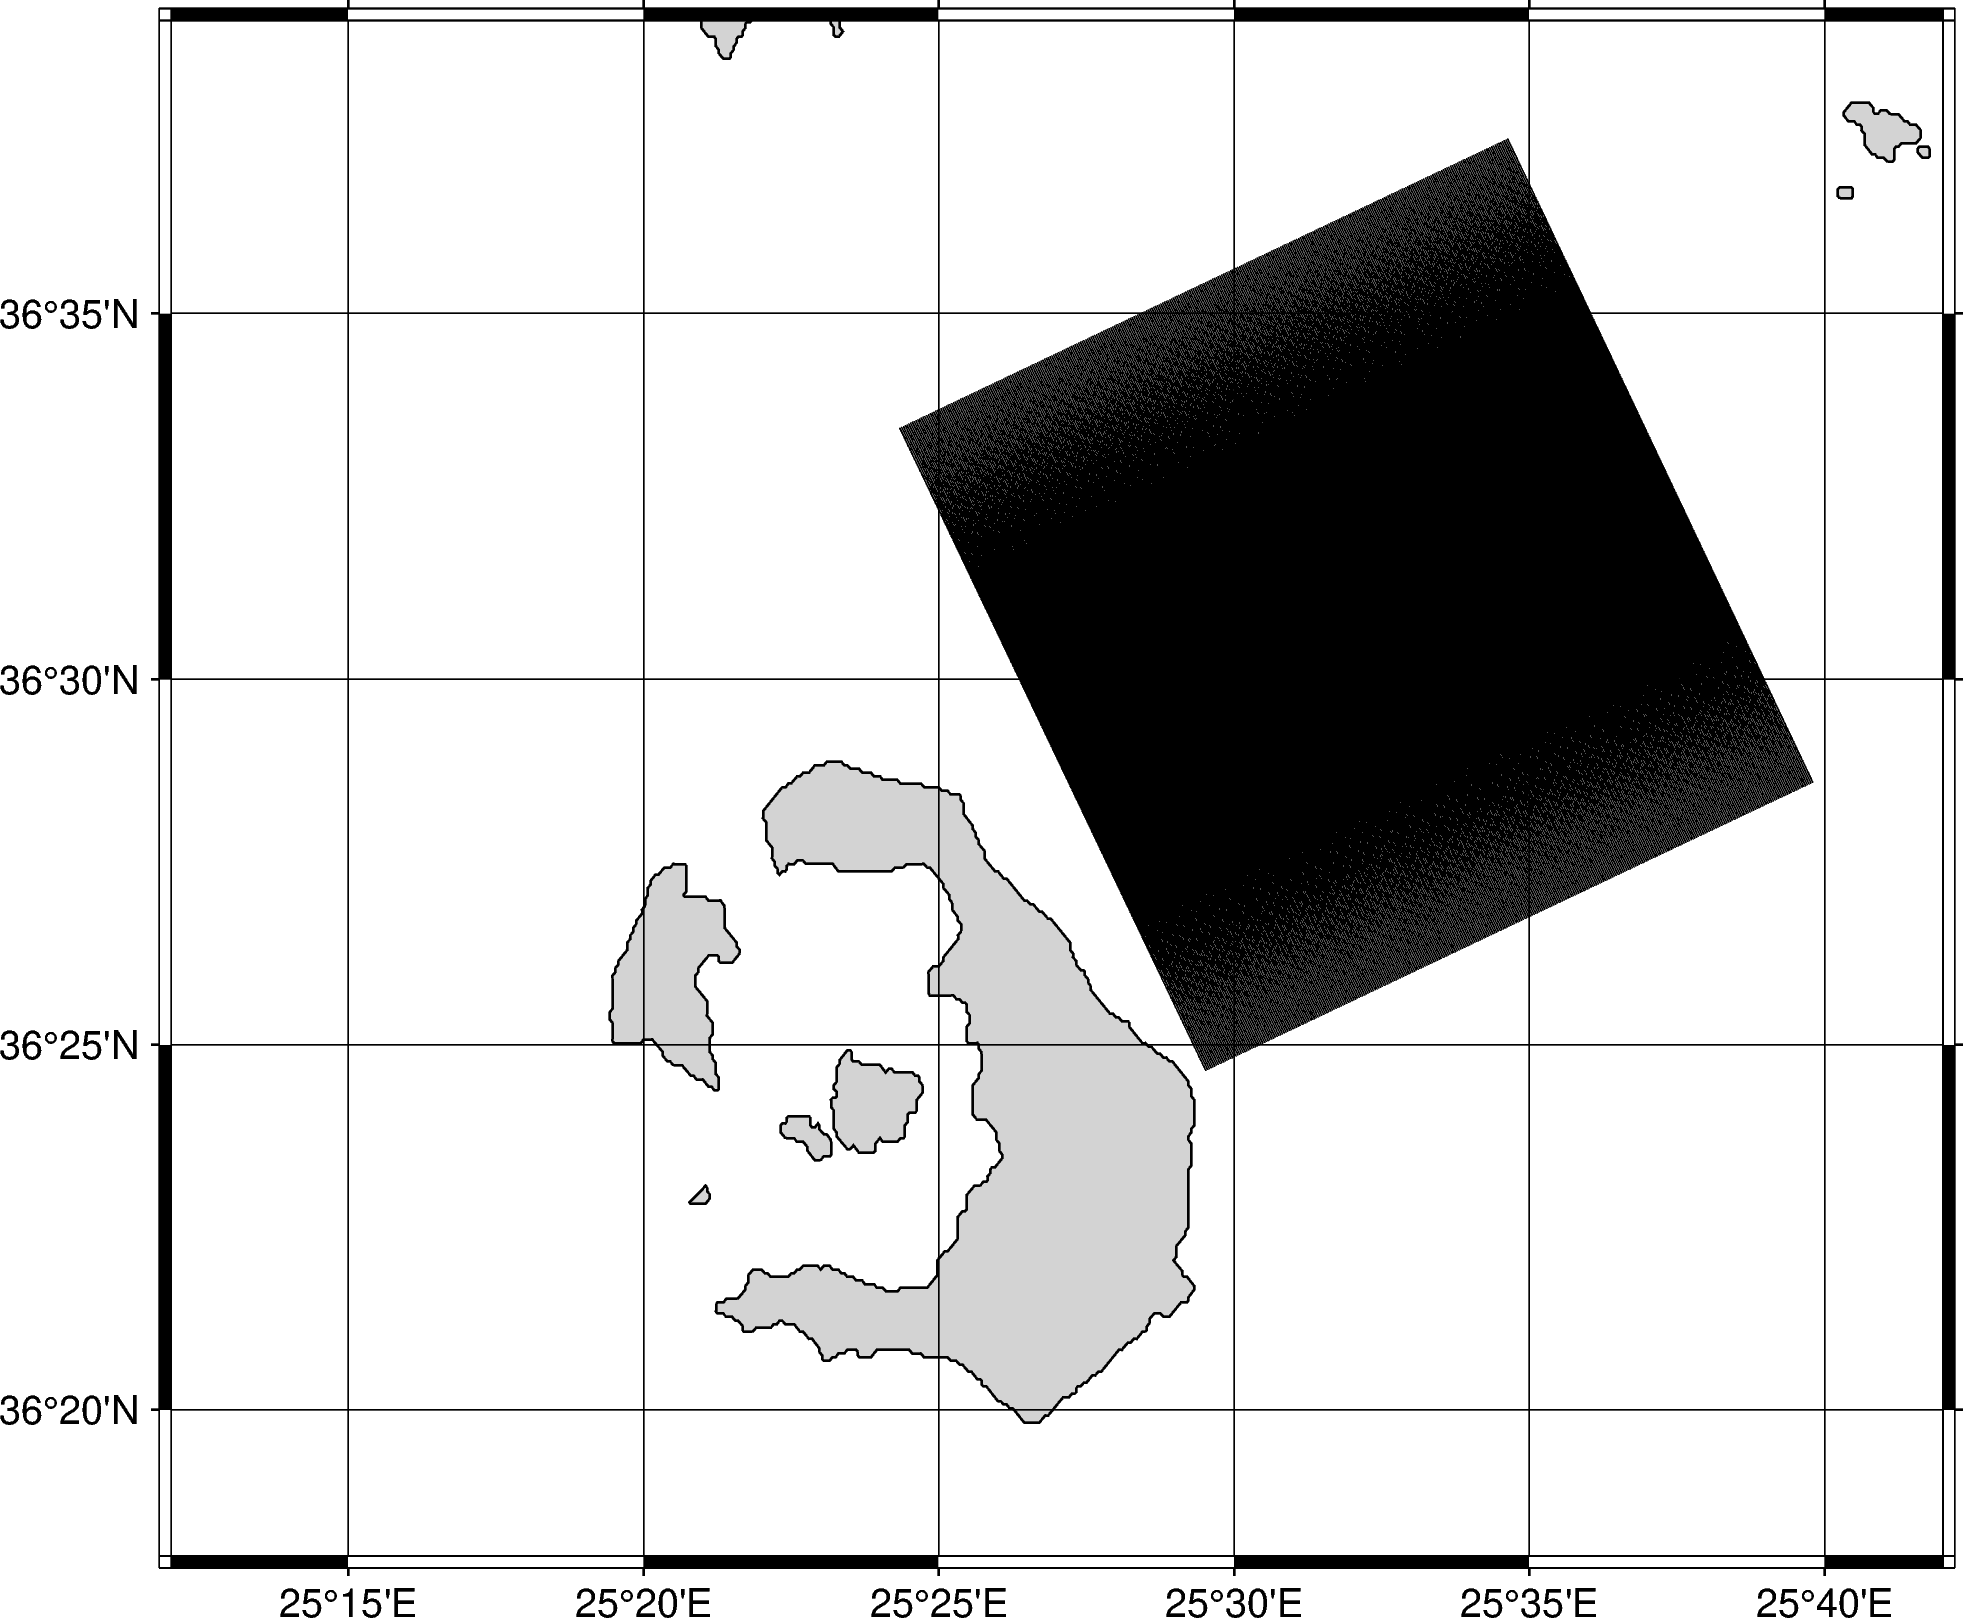

In [10]:
# plot 
import pygmt
fig = pygmt.Figure()
fig.coast(
    region="25.2/25.7/36.3/36.65",
    # Set projection to Mercator, and the figure size to 15 centimeters
    projection="M15c",
    # Set the color of the land to light gray
    land="lightgray",
    # Set the color of the water to white
    water="white",
    # Display the national borders and set the pen thickness to 0.5p
    borders="1/0.5p",
    # Display the shorelines and set the pen thickness to 0.5p
    shorelines="1/0.5p",
    # Set the frame to display annotations and gridlines
    frame="ag",)
fig.plot(x=lons, y=lats)
fig.show()

#### Alg. 
Read and flatten the 3d model so that it matches the 1d column format of the coordinate file.

In [8]:
lll(40)
path = '/home/kmc3817/c_projects_phd/fwi_sant_kolumbo/'
p14 = ProjInv('p14', path=path, dt=.0025, ns=2000, dx=50, box=b01.box, cat=0)

In [13]:
%%time 
vp = p14.o.vp.it[160].read()
vp = vp.flatten()

CPU times: user 8 ms, sys: 20 ms, total: 28 ms
Wall time: 126 ms


In [18]:
%%time 
with open('data/kol_it160_vp.txt', 'w') as f:
    for v in vp:
        #f.write('%s\n' % "{:10.5f}".format(v))
        f.write('%.0f\n' % v)

CPU times: user 6.13 s, sys: 60 ms, total: 6.19 s
Wall time: 6.48 s


#### Alg. 
Merge coordinates and vp into a single file.

In [10]:
%%time 
!paste -d' ' 'data/kol_lon_lat_dep_FLOAT.txt' 'data/kol_it160_vp.txt' > 'data/kol_it160_lon_lat_dep_vp.txt'

CPU times: user 40 ms, sys: 44 ms, total: 84 ms
Wall time: 3.45 s


## Station response

See the manuscript.

# Initial QC

#### Alg.
Merge two files `OBS_stations.csv` and `recs.csv`.

In [9]:
qc = pd.read_csv('data/OBS_stations.csv')
recs = pd.read_csv('data/recs.csv')
# select OBSes only:
obs = recs.loc[recs['id'].isin(qc['Station'])]

Three stations are missing from `obs` as they have no data and their SEGY files are not present.

In [34]:
for i in qc.Station:
    if i not in list(obs.id):
        print(i)

116
152
187


Let's exclude them from qc:

In [35]:
qc = qc.drop(qc.loc[qc.Station.isin([116,152,187])].index)
assert len(qc) == len(obs)

Merge

In [12]:
df = pd.concat([qc, obs], axis=1)
print(df.columns)
df = df.drop(columns='Unnamed: 0')
print(df.columns)

Index(['Station', 'Pool', 'Data logger', 'Bad VZ', 'Bad HY', '6Hz-Z',
       'Preferred', 'HZ RMS', 'HZ noise', 'VZ/HY signal', 'Comment (CP 2017)',
       'Comment (EH 2016)', 'Eval', 'Unnamed: 0', 'id', 'gx', 'gy', 'pool'],
      dtype='object')
Index(['Station', 'Pool', 'Data logger', 'Bad VZ', 'Bad HY', '6Hz-Z',
       'Preferred', 'HZ RMS', 'HZ noise', 'VZ/HY signal', 'Comment (CP 2017)',
       'Comment (EH 2016)', 'Eval', 'id', 'gx', 'gy', 'pool'],
      dtype='object')


#### Fig.
Plot initial-QC metadata from merged metadata.

In [15]:
# plot 
import plotly.express as px
fig = px.scatter(df, x='gx', y='gy',
                     hover_name='pool', text='id',
                     hover_data=['Comment (EH 2016)', 'Comment (CP 2017)'],  
                     width=800, height=400,
                )
fig.show(renderer="notebook")